In [1]:
import numpy as np
from pulser.waveforms import BlackmanWaveform, GaussianWaveform, RampWaveform, CompositeWaveform, ConstantWaveform

The `CompositeWaveform` allows for creation of more complex waveforms by concatenation of multiple waveforms.

Pi-pulse:


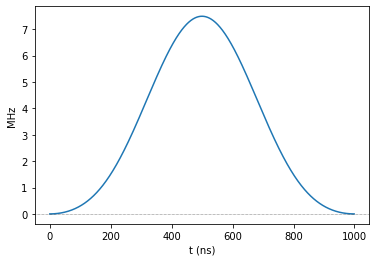

Ramp up:


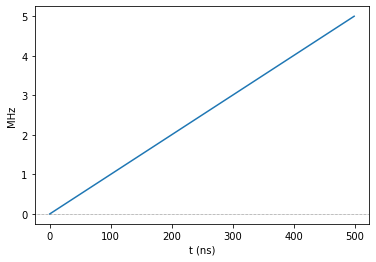

Ramp down:


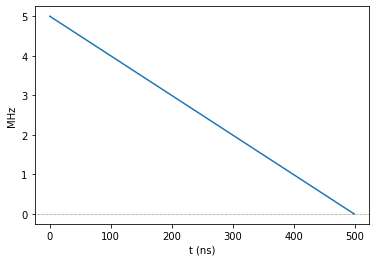

In [2]:
#Defining simple waveforms
pi_pulse = BlackmanWaveform(1000, np.pi)   # Blackman pi-pulse of 1us
up = RampWaveform(500, 0, 5)
down = RampWaveform(500, 5, 0)

print('Pi-pulse:')
pi_pulse.draw()
print('Ramp up:')
up.draw()
print('Ramp down:')
down.draw()

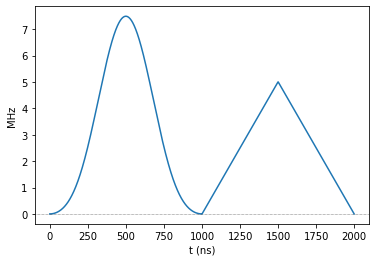

In [3]:
#Creating the CompositeWaveform
comp_wf = CompositeWaveform(pi_pulse, up, down)
comp_wf.draw()

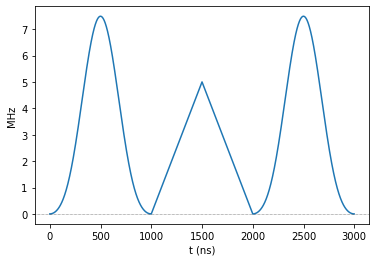

In [4]:
#Appending another pi-pulse after the triangle
comp_wf.append(pi_pulse)
comp_wf.draw()

In [5]:
# Inserting a plateau between the ramps (this one is more advanced, as it requires counting the pulses)
comp_wf.waveforms

[BlackmanWaveform(1000 ns, Area: 3.14),
 RampWaveform(500 ns, 0->5 MHz),
 RampWaveform(500 ns, 5->0 MHz),
 BlackmanWaveform(1000 ns, Area: 3.14)]

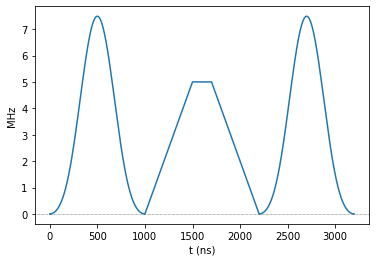

In [6]:
comp_wf.insert(ConstantWaveform(200, 5), where=2) # Inserts before the pulse in index 2 (the ramp down)
comp_wf.draw()

In [7]:
# All usual metrics are still availabe
print("Composite pulse duration: ", comp_wf.duration)
print("Composite pulse area: ", comp_wf.integral)

Composite pulse duration:  3200
Composite pulse area:  9.783185307179584
